In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris1-8/001R_3.png
/kaggle/input/iris1-8/001L_3.png
/kaggle/input/iris1-8/008L_3.png
/kaggle/input/iris1-8/007R_2.png
/kaggle/input/iris1-8/008R_2.png
/kaggle/input/iris1-8/003R_1.png
/kaggle/input/iris1-8/005R_1.png
/kaggle/input/iris1-8/002L_2.png
/kaggle/input/iris1-8/008L_2.png
/kaggle/input/iris1-8/005R_3.png
/kaggle/input/iris1-8/002L_1.png
/kaggle/input/iris1-8/007R_3.png
/kaggle/input/iris1-8/007L_2.png
/kaggle/input/iris1-8/001L_1.png
/kaggle/input/iris1-8/008L_1.png
/kaggle/input/iris1-8/004R_1.png
/kaggle/input/iris1-8/004L_1.png
/kaggle/input/iris1-8/002L_3.png
/kaggle/input/iris1-8/008R_1.png
/kaggle/input/iris1-8/005R_2.png
/kaggle/input/iris1-8/004R_2.png
/kaggle/input/iris1-8/003R_3.png
/kaggle/input/iris1-8/001L_2.png
/kaggle/input/iris1-8/004L_3.png
/kaggle/input/iris1-8/008R_3.png
/kaggle/input/iris1-8/005L_2.png
/kaggle/input/iris1-8/005L_3.png
/kaggle/input/iris1-8/007L_1.png
/kaggle/input/iris1-8/006R_3.png
/kaggle/input/iris1-8/007R_1.png
/kaggle/in

In [2]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')


In [3]:
eyes_images_file = glob('/kaggle/input/iris1-8/*.png')
print(eyes_images_file)

['/kaggle/input/iris1-8/001R_3.png', '/kaggle/input/iris1-8/001L_3.png', '/kaggle/input/iris1-8/008L_3.png', '/kaggle/input/iris1-8/007R_2.png', '/kaggle/input/iris1-8/008R_2.png', '/kaggle/input/iris1-8/003R_1.png', '/kaggle/input/iris1-8/005R_1.png', '/kaggle/input/iris1-8/002L_2.png', '/kaggle/input/iris1-8/008L_2.png', '/kaggle/input/iris1-8/005R_3.png', '/kaggle/input/iris1-8/002L_1.png', '/kaggle/input/iris1-8/007R_3.png', '/kaggle/input/iris1-8/007L_2.png', '/kaggle/input/iris1-8/001L_1.png', '/kaggle/input/iris1-8/008L_1.png', '/kaggle/input/iris1-8/004R_1.png', '/kaggle/input/iris1-8/004L_1.png', '/kaggle/input/iris1-8/002L_3.png', '/kaggle/input/iris1-8/008R_1.png', '/kaggle/input/iris1-8/005R_2.png', '/kaggle/input/iris1-8/004R_2.png', '/kaggle/input/iris1-8/003R_3.png', '/kaggle/input/iris1-8/001L_2.png', '/kaggle/input/iris1-8/004L_3.png', '/kaggle/input/iris1-8/008R_3.png', '/kaggle/input/iris1-8/005L_2.png', '/kaggle/input/iris1-8/005L_3.png', '/kaggle/input/iris1-8/007L

In [4]:
img_mpl = plt.imread(eyes_images_file[20])
img_cv2 = cv2.imread(eyes_images_file[20])
img_mpl.shape, img_cv2.shape

((576, 768, 3), (576, 768, 3))

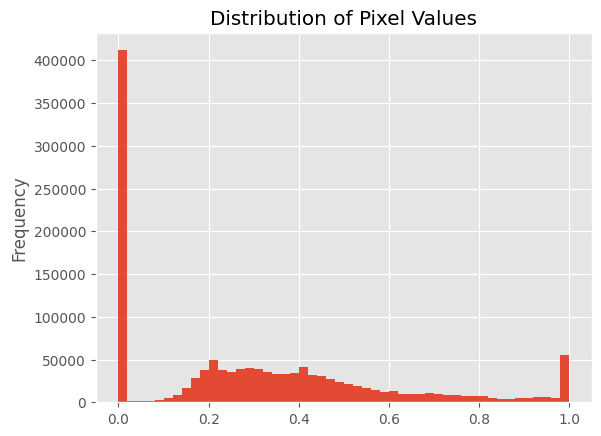

In [5]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

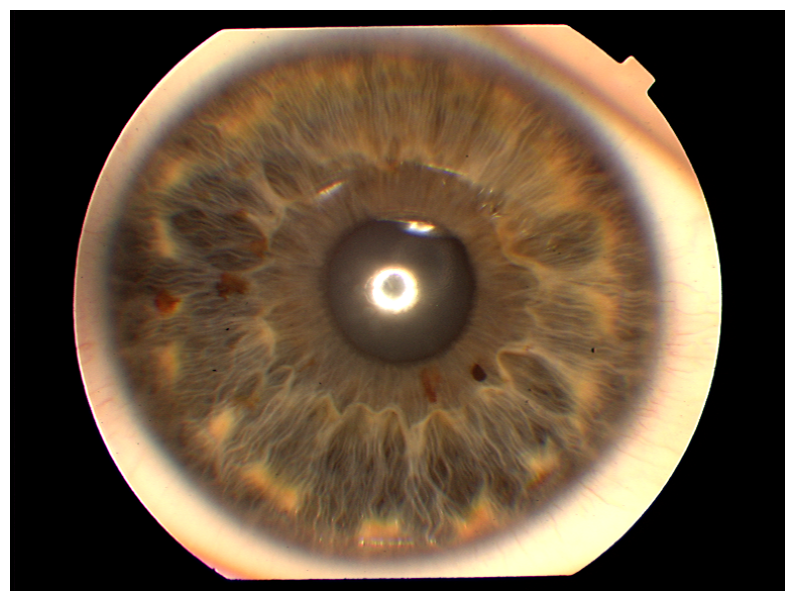

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

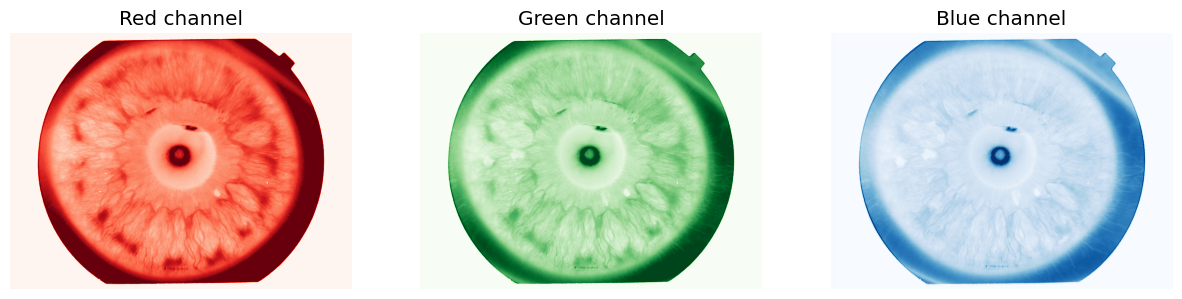

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

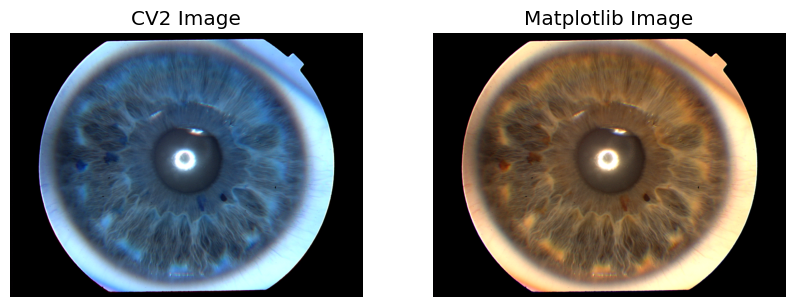

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

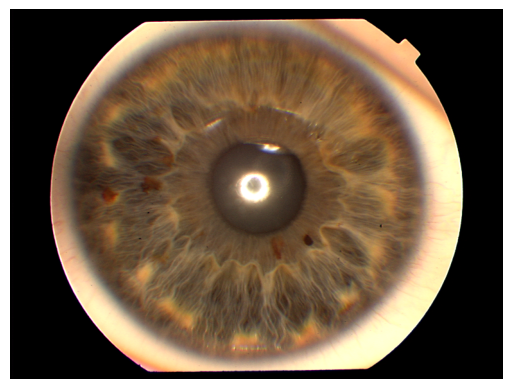

In [9]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()